In [2]:
train = pd.read_csv('train_1.csv', sep=';')
test = pd.read_csv('test_1.csv', sep=';')

In [3]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [4]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 525, 1: 175})


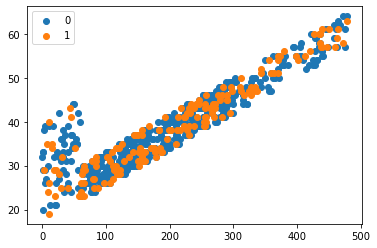

In [5]:
# scatter plot of examples by class label
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# SMOTE

In [72]:
#pip install -U imbalanced-learn

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=10)
X_sm, y_sm = smote.fit_resample(X, y)

In [22]:
from collections import Counter
counter = Counter(y_sm)
print(counter)

Counter({0: 525, 1: 525})


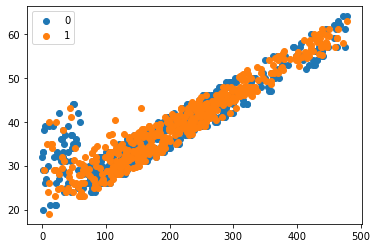

In [23]:
# scatter plot of examples by class label
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
for label, _ in counter.items():
 row_ix = where(y_sm == label)[0]
 pyplot.scatter(X_sm[row_ix, 0], X_sm[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [24]:
X_train = X_sm
X_test = test.iloc[:, :-1].values
y_train = y_sm
y_test = test.iloc[:, -1].values

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
pd.Series(y_train).value_counts()

1    525
0    525
dtype: int64

In [27]:
pd.Series(y_test).value_counts()

0    228
1     72
dtype: int64

# Logistic Regression

Логістична регресія на усіх змінних

In [34]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [35]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8666666666666667

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[195  33]
 [  7  65]]


In [37]:
Error_rate = (7+33)/(300)
Error_rate

0.13333333333333333

In [38]:
Se = 65/(65+7)
Se

0.9027777777777778

In [39]:
Sp = 195/(195+33)
Sp

0.8552631578947368

LogisticRegression: ROC AUC=0.941


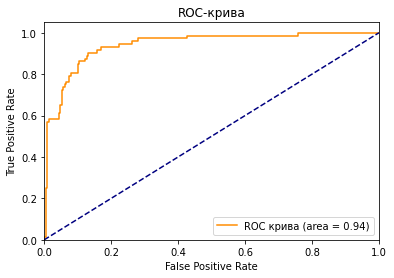

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title( 'ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

Логістична регресія на відібраних змінних

In [41]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.355883
         Iterations 12
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.487      
Dependent Variable: y                AIC:              813.3550   
Date:               2021-12-11 19:37 BIC:              976.9210   
No. Observations:   1050             Log-Likelihood:   -373.68    
Df Model:           32               LL-Null:          -727.80    
Df Residuals:       1017             LLR p-value:      2.2090e-128
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     12.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.      z      P>|z|      [0.025     0.975] 
--------------------------------------------------------------------
x1       0.2924     0.2642    1.1066   0.2685     -0.2255     0.8102
x2      -0.3254     0.2646   -1.2297   0.218

In [42]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

20
[ True  True False  True False False False  True False  True  True  True
  True False  True  True  True  True  True  True False  True False False
  True False False  True  True False False  True  True]
[ 1  1  7  1 11  4 10  1  9  1  1  1  1  3  1  1  1  1  1  1  2  1 13  6
  1  8 12  1  1 14  5  1  1]


In [334]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(train.columns[column]))
    i=i+1

[0, 1, 3, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 24, 27, 28, 31, 32]
№	Index	Feature
0	0	months_as_customer
1	1	age
2	3	policy_csl
3	7	insured_sex
4	9	insured_occupation
5	10	insured_hobbies
6	11	insured_relationship
7	12	capital-gains
8	14	incident_type
9	15	collision_type
10	16	incident_severity
11	17	authorities_contacted
12	18	incident_state
13	19	incident_city
14	21	number_of_vehicles_involved
15	24	witnesses
16	27	injury_claim
17	28	property_claim
18	31	auto_model
19	32	auto_year


In [44]:
# p-value < 3% Features
bas_X_train = X_train[:,[3,9,10,11,15,16,18,21,24,31]]
bas_X_test = X_test[:,[3,9,10,11,15,16,18,21,24,31]]

In [45]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
bas = LogisticRegression(random_state = 13).fit(bas_X_train, y_train)

In [46]:
# Predicting the Test set results
y_bas_pred = bas.predict(bas_X_test)
bas.score(bas_X_test,y_test)

0.88

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_bas_pred)
print(cm)

[[197  31]
 [  5  67]]


In [48]:
Error_rate = (5+31)/(300)
Error_rate

0.12

In [50]:
Se = 67/(67+5)
Se

0.9305555555555556

In [51]:
Sp = 197/(197+31)
Sp

0.8640350877192983

LogisticRegression: ROC AUC=0.945


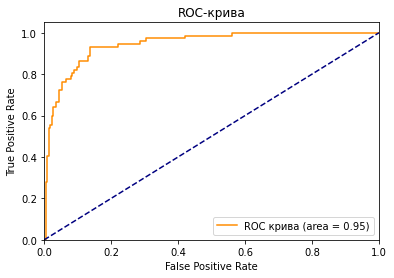

In [52]:
bas_probs = bas.predict_proba(bas_X_test)
bas_probs = bas_probs[:, 1]
bas_auc = roc_auc_score(y_test, bas_probs)
print('LogisticRegression: ROC AUC=%.3f' % (bas_auc))
fpr, tpr, treshold = roc_curve(y_test, bas_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# SVM

SVM на значущих змінних

In [62]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 10, probability=True).fit(bas_X_train, y_train)

In [63]:
# Predicting the Test set results
svm_pred = svm.predict(bas_X_test)
svm.score(bas_X_test,y_test)

0.8666666666666667

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[192  36]
 [  4  68]]


In [65]:
Error_rate = (4+36)/(300)
Error_rate

0.13333333333333333

In [66]:
Se = 68/(68+4)
Se

0.9444444444444444

In [68]:
Sp = 192/(192+36)
Sp

0.8421052631578947

SVM: ROC AUC=0.940


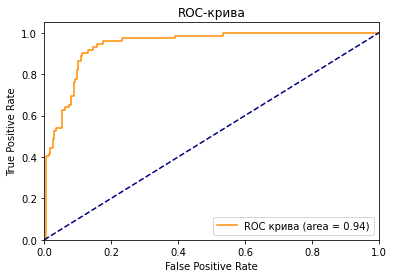

In [69]:
svm_probs = svm.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
svm_probs = svm_probs[:, 1]
# рассчитываем ROC AUC
svm_auc = roc_auc_score(y_test, svm_probs)
print('SVM: ROC AUC=%.3f' % (svm_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

SVM на усіх змінних

In [70]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm1 = SVC(kernel = 'linear', random_state = 10, probability=True).fit(X_train, y_train)

In [71]:
# Predicting the Test set results
svm_pred = svm1.predict(X_test)
svm1.score(X_test,y_test)

0.8633333333333333

In [72]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[192  36]
 [  5  67]]


In [74]:
Error_rate = (5+36)/(300)
Error_rate

0.13666666666666666

In [75]:
Se = 67/(67+5)
Se

0.9305555555555556

In [76]:
Sp = 192/(192+36)
Sp

0.8421052631578947

SVM: ROC AUC=0.937


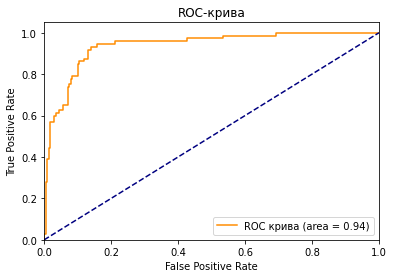

In [77]:
svm1_probs = svm1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
svm1_probs = svm1_probs[:, 1]
# рассчитываем ROC AUC
svm1_auc = roc_auc_score(y_test, svm1_probs)
print('SVM: ROC AUC=%.3f' % (svm1_auc))
fpr, tpr, treshold = roc_curve(y_test, svm1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors

KNN на значущих змінних

Minimum error:- 0.14 at K = 17


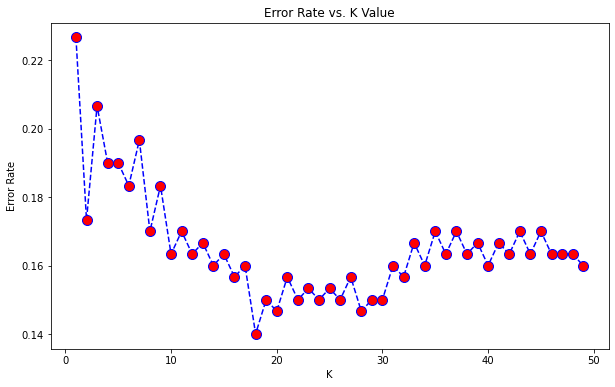

In [78]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(bas_X_train,y_train)
     pred_i = knn.predict(bas_X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [79]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 17, metric = 'minkowski', p = 2).fit(bas_X_train, y_train)

In [82]:
# Predicting the Test set results
knn_pred = knn.predict(bas_X_test)
knn.score(bas_X_test,y_test).round(3)

0.84

In [83]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[185  43]
 [  5  67]]


In [84]:
Error_rate = (5+43)/(300)
Error_rate

0.16

In [85]:
Se = 67/(67+5)
Se

0.9305555555555556

In [86]:
Sp = 185/(185+43)
Sp

0.8114035087719298

KNN: ROC AUC=0.906


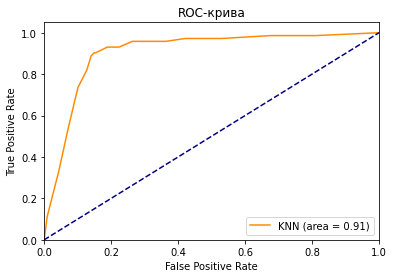

In [87]:
knn_probs = knn.predict_proba(bas_X_test)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
print('KNN: ROC AUC=%.3f' % (knn_auc))
fpr, tpr, treshold = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

KNN на усіх змінних

Minimum error:- 0.31666666666666665 at K = 1


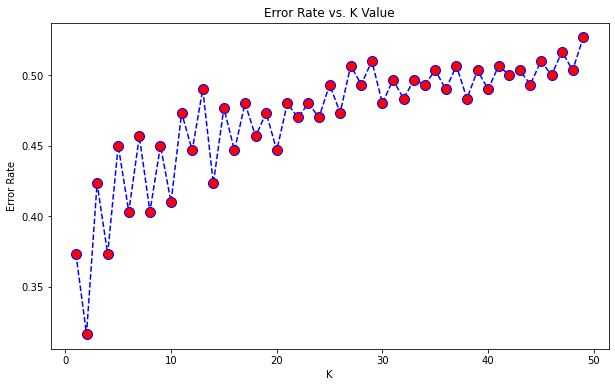

In [88]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn1 = KNeighborsClassifier(n_neighbors=i)
     knn1.fit(X_train,y_train)
     pred_i = knn1.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [95]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [96]:
# Predicting the Test set results
knn_pred = knn.predict(X_test)
knn.score(X_test,y_test).round(2)

0.63

In [97]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[137  91]
 [ 21  51]]


In [99]:
Error_rate = (21+91)/(300)
Error_rate

0.37333333333333335

In [100]:
Se = 51/(51+21)
Se

0.7083333333333334

In [101]:
Sp = 137/(137+91)
Sp

0.6008771929824561

KNN: ROC AUC=0.843


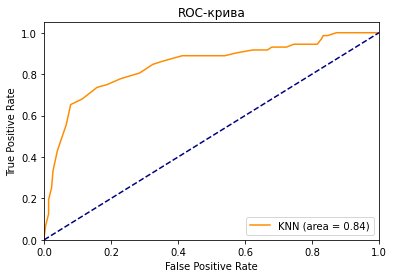

In [102]:
knn1_probs = knn1.predict_proba(X_test)
knn1_probs = knn1_probs[:, 1]
knn1_auc = roc_auc_score(y_test, knn1_probs)
print('KNN: ROC AUC=%.3f' % (knn1_auc))
fpr, tpr, treshold = roc_curve(y_test, knn1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

Naive Bayes на значущих змінних

In [103]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(bas_X_train, y_train)

In [104]:
# Predicting the Test set results
nb_pred = nb.predict(bas_X_test)
nb.score(bas_X_test,y_test)

0.86

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_pred)
print(cm)

[[192  36]
 [  6  66]]


In [106]:
Error_rate = (6+36)/(300)
Error_rate

0.14

In [107]:
Se = 66/(66+6)
Se

0.9166666666666666

In [108]:
Sp = 192/(192+36)
Sp

0.8421052631578947

NB: ROC AUC=0.926


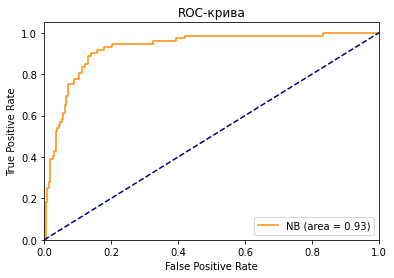

In [109]:
nb_probs = nb.predict_proba(bas_X_test)
nb_probs = nb_probs[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)
print('NB: ROC AUC=%.3f' % (nb_auc))
fpr, tpr, treshold = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Naive Bayes на усіх змінних

In [110]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB().fit(X_train, y_train)

In [114]:
# Predicting the Test set results
nb1_pred = nb1.predict(X_test)
nb1.score(X_test,y_test)

0.6466666666666666

In [115]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb1_pred)
print(cm)

[[131  97]
 [  9  63]]


In [116]:
Error_rate = (9+97)/(300)
Error_rate

0.35333333333333333

In [117]:
Se = 63/(63+9)
Se

0.875

In [118]:
Sp = 131/(131+97)
Sp

0.5745614035087719

NB: ROC AUC=0.850


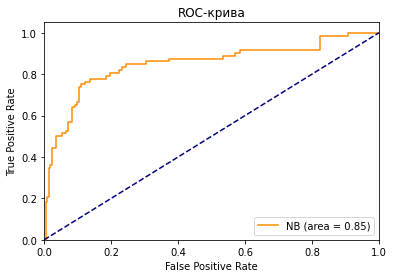

In [119]:
nb1_probs = nb1.predict_proba(X_test)
nb1_probs = nb1_probs[:, 1]
nb1_auc = roc_auc_score(y_test, nb1_probs)
print('NB: ROC AUC=%.3f' % (nb1_auc))
fpr, tpr, treshold = roc_curve(y_test, nb1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Classification Tree

Classification Tree на значущих змінних

In [120]:
# Function Max Leaf
def max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

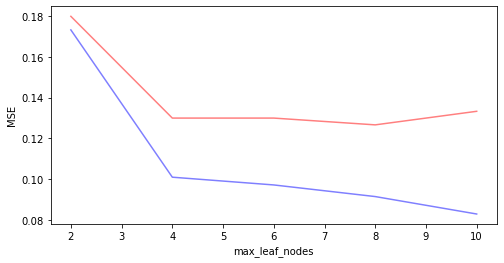

In [121]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [137]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(bas_X_train, y_train)

In [138]:
# Predicting the Test set results
ct_pred = ct.predict(bas_X_test)
ct.score(bas_X_test,y_test)

0.8666666666666667

In [139]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[192  36]
 [  4  68]]


In [140]:
Error_rate = (4+36)/(300)
Error_rate

0.13333333333333333

In [141]:
Se = 68/(68+4)
Se

0.9444444444444444

In [142]:
Sp = 192/(192+36)
Sp

0.8421052631578947

CT: ROC AUC=0.907


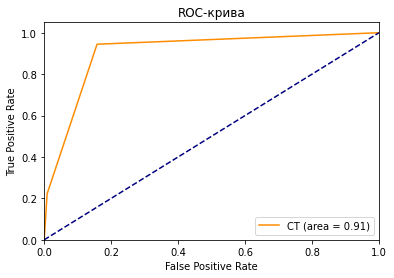

In [143]:
ct_probs = ct.predict_proba(bas_X_test)
ct_probs = ct_probs[:, 1]
ct_auc = roc_auc_score(y_test, ct_probs)
print('CT: ROC AUC=%.3f' % (ct_auc))
fpr, tpr, treshold = roc_curve(y_test, ct_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='CT (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Classification Tree на усіх змінних

In [144]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

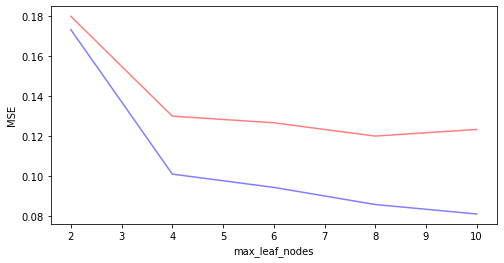

In [145]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [161]:
# Fitting Classification Tree to the Training set (2 variables)
ct1 = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [162]:
# Predicting the Test set results
ct_pred = ct1.predict(X_test)
ct1.score(X_test,y_test)

0.8666666666666667

In [163]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[192  36]
 [  4  68]]


In [164]:
Error_rate = (36+4)/(300)
Error_rate

0.13333333333333333

In [166]:
Se = 68/(68+4)
Se

0.9444444444444444

In [167]:
Sp = 192/(192+36)
Sp

0.8421052631578947

CT: ROC AUC=0.907


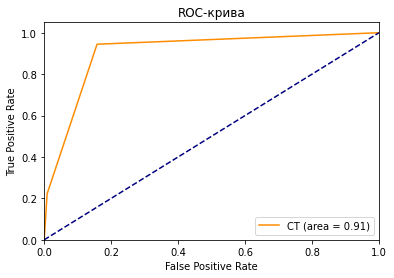

In [168]:
ct1_probs = ct1.predict_proba(X_test)
ct1_probs = ct1_probs[:, 1]
ct1_auc = roc_auc_score(y_test, ct1_probs)
print('CT: ROC AUC=%.3f' % (ct1_auc))
fpr, tpr, treshold = roc_curve(y_test, ct1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='CT (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Random Forest

Random Forest на значущих змінних

In [169]:
def rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

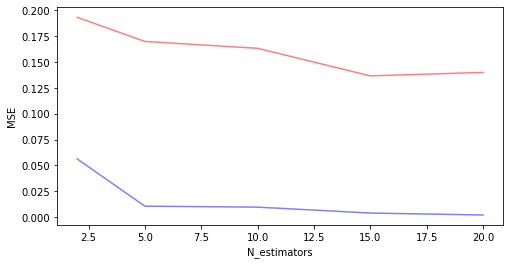

In [170]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [182]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=15, max_leaf_nodes =i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

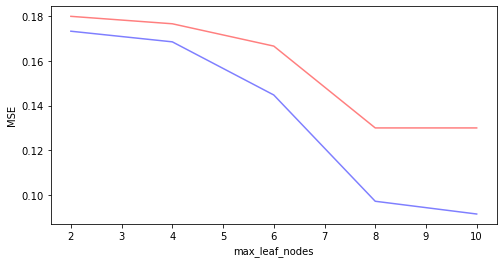

In [183]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [195]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 15, max_leaf_nodes = 8, random_state = 10).fit(bas_X_train, y_train)

In [196]:
# Predicting the Test set results
rf_pred = rf.predict(bas_X_test)
rf_pred = (rf_pred > 0.5)
rf.score(bas_X_test,y_test)

0.87

In [197]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[198  30]
 [  9  63]]


In [198]:
Error_rate = (9+30)/(300)
Error_rate

0.13

In [199]:
Se = 63/(63+9)
Se

0.875

In [200]:
Sp = 198/(198+30)
Sp

0.868421052631579

RF: ROC AUC=0.922


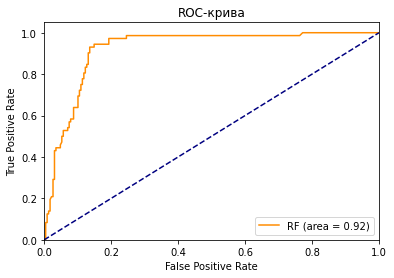

In [201]:
rf_probs = rf.predict_proba(bas_X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('RF: ROC AUC=%.3f' % (rf_auc))
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='RF (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Random Forest на усіх змінних

In [202]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

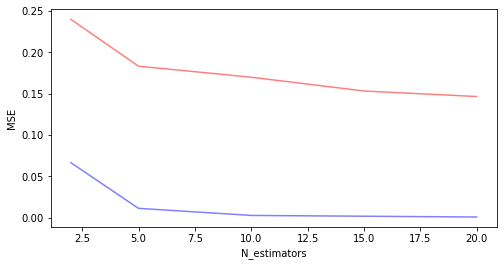

In [203]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [223]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=17, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

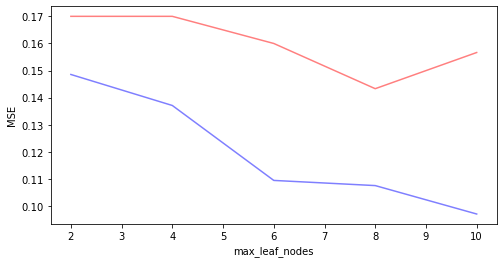

In [224]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [240]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 15, max_leaf_nodes = 8, random_state = 10).fit(X_train, y_train)

In [241]:
# Predicting the Test set results
rf_pred = rf.predict(X_test)
rf_pred = (rf_pred > 0.6)
rf.score(X_test,y_test)

0.8533333333333334

In [242]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[205  23]
 [ 21  51]]


In [243]:
Error_rate = (21+23)/(300)
Error_rate

0.14666666666666667

In [244]:
Se = 51/(51+21)
Se

0.7083333333333334

In [245]:
Sp = 205/(205+23)
Sp

0.8991228070175439

RF: ROC AUC=0.909


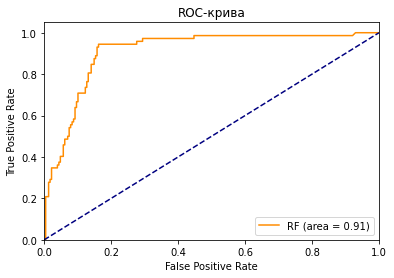

In [246]:
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('RF: ROC AUC=%.3f' % (rf_auc))
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='RF (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Classification Neural Network

Classification Neural Network на усіх змінних

In [247]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [248]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 33, init = 'uniform', activation = 'linear', input_dim =33))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", input_dim=33, units=33, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [249]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 80, validation_data=(X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1050 samples, validate on 300 samples
Epoch 1/80
1050/1050 [==============================] - 1s 588us/step - loss: 0.5934 - accuracy: 0.7400 - val_loss: 0.5109 - val_accuracy: 0.7700
Epoch 2/80
1050/1050 [==============================] - 0s 381us/step - loss: 0.4186 - accuracy: 0.8476 - val_loss: 0.3837 - val_accuracy: 0.8433
Epoch 3/80
1050/1050 [==============================] - 0s 450us/step - loss: 0.3797 - accuracy: 0.8590 - val_loss: 0.3542 - val_accuracy: 0.8600
Epoch 4/80
1050/1050 [==============================] - 0s 447us/step - loss: 0.3724 - accuracy: 0.8667 - val_loss: 0.3520 - val_accuracy: 0.8667
Epoch 5/80
1050/1050 [==============================] - 0s 431us/step - loss: 0.3699 - accuracy: 0.8686 - val_loss: 0.3472 - val_accuracy: 0.8733
Epoch 6/80
1050/1050 [==============================] - 0s 410us/step - loss: 0.3676 - accuracy: 0.8724 - val_loss: 0.3500 - val_accuracy: 0.8667
Epoch 7/80
1050/1050 [==============================] - 0s 439us/step - loss:

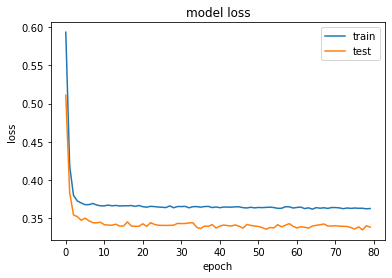

In [250]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [275]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.52)

In [276]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[198  30]
 [  7  65]]


In [277]:
Accurary_rate = (198+65)/(300)
Accurary_rate

0.8766666666666667

In [278]:
Error_rate = (7+30)/(300)
Error_rate

0.12333333333333334

In [279]:
Se = 65/(65+7)
Se

0.9027777777777778

In [280]:
Sp = 198/(198+30)
Sp

0.868421052631579

CNN: ROC AUC=0.941


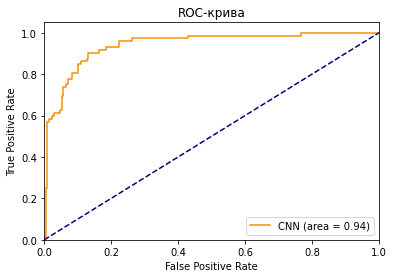

In [281]:
cnn_probs = cnn.predict_proba(X_test)
cnn_probs = cnn_probs[:, -1]
cnn_auc = roc_auc_score(y_test, cnn_probs)
print('CNN: ROC AUC=%.3f' % (cnn_auc))
fpr, tpr, treshold = roc_curve(y_test, cnn_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='CNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Classification Neural Network на значущих змінних

In [291]:
# Initialising the ANN
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(output_dim = 9, init = 'uniform', activation = 'linear', input_dim = 10))

# Adding the output layer
cnn1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", input_dim=10, units=9, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [292]:
# Fitting the ANN to the Training set
history = cnn1.fit(bas_X_train, y_train, batch_size = 8, nb_epoch = 100, validation_data=(bas_X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1050 samples, validate on 300 samples
Epoch 1/100
1050/1050 [==============================] - 1s 589us/step - loss: 0.6529 - accuracy: 0.7724 - val_loss: 0.5803 - val_accuracy: 0.7967
Epoch 2/100
1050/1050 [==============================] - 0s 312us/step - loss: 0.4862 - accuracy: 0.8400 - val_loss: 0.4328 - val_accuracy: 0.8233
Epoch 3/100
1050/1050 [==============================] - 0s 304us/step - loss: 0.4052 - accuracy: 0.8676 - val_loss: 0.3775 - val_accuracy: 0.8500
Epoch 4/100
1050/1050 [==============================] - 0s 315us/step - loss: 0.3819 - accuracy: 0.8686 - val_loss: 0.3585 - val_accuracy: 0.8600
Epoch 5/100
1050/1050 [==============================] - 0s 314us/step - loss: 0.3742 - accuracy: 0.8686 - val_loss: 0.3504 - val_accuracy: 0.8667
Epoch 6/100
1050/1050 [==============================] - 0s 310us/step - loss: 0.3720 - accuracy: 0.8667 - val_loss: 0.3455 - val_accuracy: 0.8733
Epoch 7/100
1050/1050 [==============================] - 0s 331us/step 

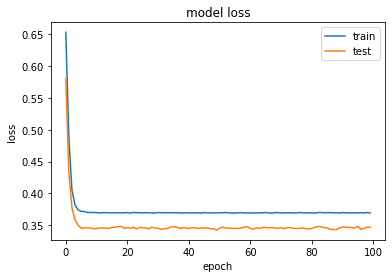

In [293]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [326]:
# Predicting the Test set results
y_pred = cnn1.predict(bas_X_test)
y_pred = (y_pred > 0.49)

In [327]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[197  31]
 [  5  67]]


In [328]:
Accurary_rate = (197+67)/(300)
Accurary_rate

0.88

In [329]:
Error_rate = (5+31)/(300)
Error_rate

0.12

In [330]:
Se = 67/(67+5)
Se

0.9305555555555556

In [332]:
Sp = 197/(197+31)
Sp

0.8640350877192983

СNN: ROC AUC=0.945


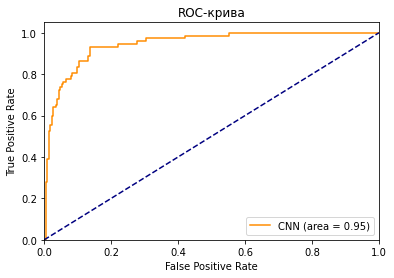

In [333]:
cnn1_probs = cnn1.predict_proba(bas_X_test)
cnn1_probs = cnn1_probs[:, -1]
cnn1_auc = roc_auc_score(y_test, cnn1_probs)
print('СNN: ROC AUC=%.3f' % (cnn1_auc))
fpr, tpr, treshold = roc_curve(y_test, cnn1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='СNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()